In [1]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import pydot
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import export_graphviz

In [5]:
data = pd.read_csv("Cleaned-Data.csv")
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


In [6]:
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [7]:
y=data['Severity_Severe']
X=data.drop(['Country','Severity_Severe','Severity_Mild','Severity_None','Severity_Moderate'],axis='columns')



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, train_size=0.2)

In [9]:
data[:8]

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,0
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [10]:
"""le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass"""

'le = preprocessing.LabelEncoder()\nfor column_name in data.columns:\n    if data[column_name].dtype == object:\n        data[column_name] = le.fit_transform(data[column_name])\n    else:\n        pass'

In [11]:
forest=RandomForestClassifier(n_estimators=10,max_depth=10,max_features=2)
model=forest.fit(X_train,y_train)
pred= forest.predict(X_test)

print("accuracy {:.3f}".format(accuracy_score(y_test, pred)))

accuracy 0.751


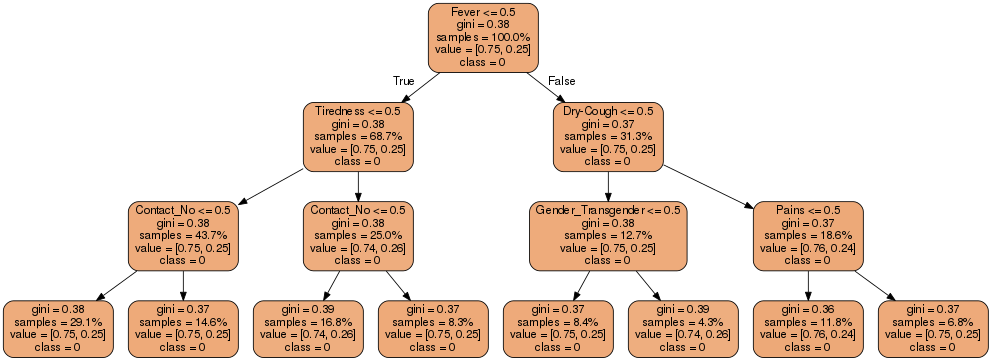

In [12]:
forest=RandomForestClassifier(n_estimators=2,max_depth=3)
model=forest.fit(X_train,y_train)
pred= forest.predict(X_test)


estimator = model.estimators_[1]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['0','1'],
                rounded = True, proportion = True, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=60'])

from IPython.display import Image
Image(filename = 'tree.png')

In [13]:
"""forest=tree.DecisionTreeClassifier(min_samples_split=39,max_depth=10,max_features=2)
model=forest.fit(X_train,y_train)"""

'forest=tree.DecisionTreeClassifier(min_samples_split=39,max_depth=10,max_features=2)\nmodel=forest.fit(X_train,y_train)'

In [14]:
#tree.plot_tree(forest.fit(X_train, y_train)) 

In [15]:
"""forest=tree.DecisionTreeClassifier(min_samples_split=17000,max_depth=2,max_features=2)
model=forest.fit(X_train,y_train)"""

'forest=tree.DecisionTreeClassifier(min_samples_split=17000,max_depth=2,max_features=2)\nmodel=forest.fit(X_train,y_train)'

In [ ]:
#tree.plot_tree(forest.fit(X_train, y_train)) 

In [ ]:
from sklearn.model_selection import GridSearchCV

 

n_estimators = np.arange(10,100,10)
max_depth = np.arange(10,30,5)
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
             min_samples_split = min_samples_split, 
            min_samples_leaf = min_samples_leaf)

 

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min


In [106]:
print("best max_depth", bestF.best_estimator_.get_params()['max_depth'])
print("best n_estimators", bestF.best_estimator_.get_params()['n_estimators'])
print("best min_samples_leaf", bestF.best_estimator_.get_params()['min_samples_leaf'])
print("max_features", bestF.best_estimator_.get_params()['min_samples_split'])


best max_depth 10
best n_estimators 10
best min_samples_leaf 1
max_features 2


In [107]:
res=pd.DataFrame(gridF.cv_results_)
max(res['mean_test_score'])

0.7493371212121213